In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
#news
path_news = '/content/drive/My Drive/Colab Notebooks/data/'
summary = pd.read_csv(path_news+'news_summary.csv', encoding='iso-8859-1')
raw = pd.read_csv(path_news+'news_summary_more.csv', encoding='iso-8859-1')
summary, raw

(                  author  ...                                              ctext
 0           Chhavi Tyagi  ...  The Daman and Diu administration on Wednesday ...
 1            Daisy Mowke  ...  From her special numbers to TV?appearances, Bo...
 2         Arshiya Chopra  ...  The Indira Gandhi Institute of Medical Science...
 3          Sumedha Sehra  ...  Lashkar-e-Taiba's Kashmir commander Abu Dujana...
 4     Aarushi Maheshwari  ...  Hotels in Mumbai and other Indian cities are t...
 ...                  ...  ...                                                ...
 4509      Mansha Mahajan  ...  Mumbai, Feb 23 (PTI) Fruit juice concentrate m...
 4510      Dishant Sharma  ...  Former cricketer Sachin Tendulkar was spotted ...
 4511       Tanya Dhingra  ...  Aamir Khan, whose last film Dangal told the st...
 4512      Pragya Swastik  ...  Maharahstra Power Minister Chandrashekhar Bawa...
 4513        Chhavi Tyagi  ...  More than half of the languages spoken by Indi...
 
 [4514 rows x 

In [2]:
import pickle
path_cnn= '/content/drive/My Drive/Colab Notebooks/data/processedID_cnn_dataset.pkl'
stories = pickle.load(open(path_cnn, 'rb'))
print("total number of CNN data: ",len(stories))


total number of CNN data:  92579


In [3]:
index_story = 0
sample_story = stories[index_story]
count_ws =0
for sentence in sample_story['story']:
  for word in sentence.split(' '):
    count_ws += 1
print("# word in story {}: {}".format(index_story,count_ws))

count_h, count_wh = 0,0
for highlight in sample_story['highlights']:
  count_h += 1
  for word in highlight.split(' '):
    count_wh += 1
print("# hightlights of story {}: {}".format(index_story,count_h))
print("# word in all hightlights of story {}: {}".format(index_story,count_wh))
print()
stories[1]

# word in story 0: 1511
# hightlights of story 0: 4
# word in all hightlights of story 0: 52



{'highlights': ['usain bolt wins third gold of world championship',
  'anchors jamaica to relay victory',
  'eighth gold at the championships for bolt',
  'jamaica double up in womens relay'],
 'id': 'id_1',
 'story': ['usain bolt rounded off the world championships sunday by claiming his third gold in moscow as he anchored jamaica to victory in the mens relay',
  'the fastest man in the world charged clear of united states rival justin gatlin as the jamaican quartet of nesta carter kemar baileycole nickel ashmeade and bolt won in seconds',
  'the us finished second in seconds with canada taking the bronze after britain were disqualified for a faulty handover',
  'the bolt has now collected eight gold medals at world championships equaling the record held by american trio carl lewis michael johnson and allyson felix not to mention the small matter of six olympic titles',
  'the relay triumph followed individual successes in the and meters in the russian capital',
  'im proud of myself 

In [28]:
#news
pre1 =  raw.iloc[:,0:2].copy()
# pre1['head + text'] = pre1['headlines'].str.cat(pre1['text'], sep =" ") 

pre2 = summary.iloc[:,0:6].copy()
pre2['text'] = pre2['author'].str.cat(pre2['date'].str.cat(pre2['read_more'].str.cat(pre2['text'].str.cat(pre2['ctext'], sep = " "), sep =" "),sep= " "), sep = " ")

pre = pd.DataFrame()
pre['text'] = pd.concat([pre1['text'], pre2['text']], ignore_index=True)
pre['summary'] = pd.concat([pre1['headlines'],pre2['headlines']],ignore_index = True)

print(len(pre))
print(pre.loc[4,'text'])
print()
pre.head(5)

102915
Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, "I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed." "In the #MeToo movement, I always believe a woman. But in this case, we need to reserve our judgment," she added. Hirani has been accused by an assistant who worked in 'Sanju'.



,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."


In [4]:
import copy

# join sentence in both stories and highlights together for each data sample
processed_stories = copy.deepcopy(stories)
for each_story in processed_stories:
  each_story['story'] = ' '.join(each_story['story'])
  each_story['highlights'] = ' '.join(each_story['highlights'])

# join stories and highlights into 2 column pd dataframe
stories[1],processed_stories[1]

({'highlights': ['usain bolt wins third gold of world championship',
   'anchors jamaica to relay victory',
   'eighth gold at the championships for bolt',
   'jamaica double up in womens relay'],
  'id': 'id_1',
  'story': ['usain bolt rounded off the world championships sunday by claiming his third gold in moscow as he anchored jamaica to victory in the mens relay',
   'the fastest man in the world charged clear of united states rival justin gatlin as the jamaican quartet of nesta carter kemar baileycole nickel ashmeade and bolt won in seconds',
   'the us finished second in seconds with canada taking the bronze after britain were disqualified for a faulty handover',
   'the bolt has now collected eight gold medals at world championships equaling the record held by american trio carl lewis michael johnson and allyson felix not to mention the small matter of six olympic titles',
   'the relay triumph followed individual successes in the and meters in the russian capital',
   'im proud

In [5]:
# join stories and highlights into 2 column pd dataframe
df_cnn = pd.DataFrame(processed_stories)
df_cnn

,story,highlights,id
0,its official us president barack obama wants l...,syrian official obama climbed to the top of th...,id_0
1,usain bolt rounded off the world championships...,usain bolt wins third gold of world championsh...,id_1
2,the general services administration already un...,the employee in agencys kansas city office is ...,id_2
3,a medical doctor in vancouver british columbia...,new a canadian doctor says she was part of a t...,id_3
4,police arrested another teen thursday the sixt...,another arrest made in gang rape outside calif...,id_4
...,...,...,...
92574,a second grand jurys decision not to indict a ...,new speaker boehner said american people deser...,id_92574
92575,california gov jerry brown will seek an immedi...,gov jerry brown will seek a stay of what he ca...,id_92575
92576,norfolk virginia cnnthe second mate of the hou...,father i know he went through what he went thr...,id_92576
92577,realsimplecom tired of counting sheep try one ...,fragrances that make you feel calm such as lav...,id_92577


In [54]:
#news
import re

#Removes non-alphabetic characters:
def text_strip(column):
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()  #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)

        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        yield row
brief_cleaning1 = text_strip(pre['text'])
brief_cleaning2 = text_strip(pre['summary'])

brief_cleaning1, brief_cleaning2

(<generator object text_strip at 0x7fa9884c0d00>,
 <generator object text_strip at 0x7fa9884c0518>)

In [58]:
#news
from time import time
import spacy
nlp = spacy.load('en', disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:
#If data loss seems to be happening(i.e len(text) = 50 instead of 75 etc etc) in this cell , decrease the batch_size parametre 

t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
text = [str(doc) for doc in nlp.pipe(brief_cleaning1, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 5.05 mins


In [59]:
#news
#Taking advantage of spaCy .pipe() method to speed-up the cleaning process:


t = time()

#Batch the data points into 5000 and run on all cores for faster preprocessing
summary = ['_START_ '+ str(doc) + ' _END_' for doc in nlp.pipe(brief_cleaning2, batch_size=5000, n_threads=-1)]

#Takes 7-8 mins
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.97 mins


In [70]:
#news
print(pre.loc[0,'text'])
print(text[0])
print()
print(pre.loc[0,'summary'])
print(summary[0])

Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
saurav kant an alumnus of upgrad and iiit-b pg program in machine learning and artificial intelligence was sr systems engineer at infosys with almost years of work experience the program and upgrad 360-degree career support helped him transition to data scientist at tech mahindra with 90% salary hike upgrad online power learning has powered lakh+ careers.

upGrad learner switches to career in ML & Al with 90% salary hike
_START_ upgrad learner switches to career in ml al with 90% salary hike _END_


In [6]:
# add __START__ and __END__ tokens to highlights

df_cnn['processed_highlights'] = '_START_ '+df_cnn['highlights'].astype(str)+' _END_'

print(df_cnn.loc[0,'highlights'])
print(df_cnn.loc[0,'processed_highlights'])

df_cnn

syrian official obama climbed to the top of the tree doesnt know how to get down obama sends a letter to the heads of the house and senate obama to seek congressional approval on military action against syria aim is to determine whether cw were used not by whom says un spokesman
_START_ syrian official obama climbed to the top of the tree doesnt know how to get down obama sends a letter to the heads of the house and senate obama to seek congressional approval on military action against syria aim is to determine whether cw were used not by whom says un spokesman _END_


,story,highlights,id,processed_highlights
0,its official us president barack obama wants l...,syrian official obama climbed to the top of th...,id_0,_START_ syrian official obama climbed to the t...
1,usain bolt rounded off the world championships...,usain bolt wins third gold of world championsh...,id_1,_START_ usain bolt wins third gold of world ch...
2,the general services administration already un...,the employee in agencys kansas city office is ...,id_2,_START_ the employee in agencys kansas city of...
3,a medical doctor in vancouver british columbia...,new a canadian doctor says she was part of a t...,id_3,_START_ new a canadian doctor says she was par...
4,police arrested another teen thursday the sixt...,another arrest made in gang rape outside calif...,id_4,_START_ another arrest made in gang rape outsi...
...,...,...,...,...
92574,a second grand jurys decision not to indict a ...,new speaker boehner said american people deser...,id_92574,_START_ new speaker boehner said american peop...
92575,california gov jerry brown will seek an immedi...,gov jerry brown will seek a stay of what he ca...,id_92575,_START_ gov jerry brown will seek a stay of wh...
92576,norfolk virginia cnnthe second mate of the hou...,father i know he went through what he went thr...,id_92576,_START_ father i know he went through what he ...
92577,realsimplecom tired of counting sheep try one ...,fragrances that make you feel calm such as lav...,id_92577,_START_ fragrances that make you feel calm suc...


In [74]:
#news
pre['cleaned_text'] = pd.Series(text)
pre['cleaned_summary'] = pd.Series(summary)
pre

,text,summary,cleaned_text,cleaned_summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...,saurav kant an alumnus of upgrad and iiit-b pg...,_START_ upgrad learner switches to career in m...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...,kunal shah credit card bill payment platform c...,_START_ delhi techie wins free food from swigg...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...,new zealand defeated india by wickets in the f...,_START_ new zealand end rohit sharma-led india...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...,with aegon life iterm insurance plan customers...,_START_ aegon life iterm insurance plan helps ...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim...",speaking about the sexual harassment allegatio...,_START_ have known hirani for yrs what if meto...
...,...,...,...,...
102910,"Mansha Mahajan 24 Feb 2017,Friday http://india...",Rasna seeking ?250 cr revenue from snack categ...,mansha mahajan 24 feb 2017 friday indiatoday.i...,_START_ rasna seeking 250 cr revenue from snac...
102911,"Dishant Sharma 03 Aug 2017,Thursday http://ind...",Sachin attends Rajya Sabha after questions on ...,dishant sharma 03 aug 2017 thursday indiatoday...,_START_ sachin attends rajya sabha after quest...
102912,"Tanya Dhingra 03 Aug 2017,Thursday http://www....",Shouldn't rob their childhood: Aamir on kids r...,tanya dhingra 03 aug 2017 thursday www.hindust...,_START_ shouldn rob their childhood aamir on k...
102913,"Pragya Swastik 07 Dec 2016,Wednesday http://in...","Asha Bhosle gets ?53,000 power bill for unused...",pragya swastik 07 dec 2016 wednesday indiatoda...,_START_ asha bhosle gets 53 000 power bill for...


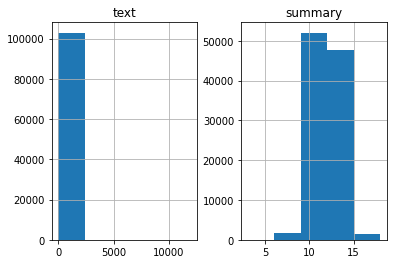

In [76]:
#news
import matplotlib.pyplot as plt

text_count = []
summary_count = []
for sent in pre['cleaned_text']:
    text_count.append(len(sent.split()))
for sent in pre['cleaned_summary']:
    summary_count.append(len(sent.split()))

graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

import matplotlib.pyplot as plt

graph_df.hist(bins = 5)
plt.show()

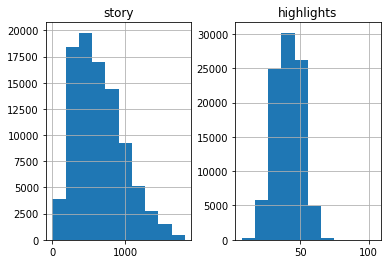

In [7]:
# !pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

text_count = []
summary_count = []
for sent in df_cnn['story']:
    text_count.append(len(sent.split()))
for sent in df_cnn['highlights']:
    summary_count.append(len(sent.split()))

graph_df= pd.DataFrame()
graph_df['story']=text_count
graph_df['highlights']=summary_count


graph_df.hist(bins = 10)
plt.show()

# sns.displot(df_cnn, x="story", binwidth=10)
# sns.displot(df_cnn, x="highlights", binwidth=10)



In [90]:
#news
#Check how much % of summary have 0-15 words
cnt=0
for i in pre['cleaned_summary']:
    if(len(i.split())<=15):
        cnt=cnt+1
print(cnt/len(pre['cleaned_summary']))

#Check how much % of text have 0-70 words
cnt=0
for i in pre['cleaned_text']:
    if(len(i.split())<=100):
        cnt=cnt+1
print(cnt/len(pre['cleaned_text']))

#Check how much % of summary have 0-15 words
count=0
for i in df_cnn['story']:
    if(len(i.split())<=15):
        count=count+1
print(count/len(df_cnn['story']))

#Check how much % of text have 0-70 words
count=0
for i in df_cnn['story']:
    if(len(i.split())<=100):
        count=count+1
print(count/len(df_cnn['story']))

0.9978234465335472
0.9578389933440218
0.0012637855237148813
0.006167705419155532


In [8]:
def count_perc_words(df,col_name='story',len_start=0,len_end=15):
  #Check how much % of summary have ... number of words.
  count=0
  for sentence in df_cnn[col_name]:
      num_word = len(sentence.split()) 
      if  (num_word >= len_start) and (num_word < len_end):
          count=count+1
  return (count/len(df_cnn[col_name]))

print("% of story have 0 to 500 words =",count_perc_words(df_cnn,'story',0,500))
print("% of story have 500 to 1000 words =",count_perc_words(df_cnn,'story',500,1000))
print("% of story have 1000 to 1500 words =",count_perc_words(df_cnn,'story',1000,1500))
print("% of story have more than 1500 words =",count_perc_words(df_cnn,'story',1500,9900))


% of story have 0 to 500 words = 0.4032880026787932
% of story have 500 to 1000 words = 0.44773652772226963
% of story have 1000 to 1500 words = 0.13255705937631646
% of story have more than 1500 words = 0.01641841022262068


In [9]:

print("% of highlight have 0 to 50 words =",count_perc_words(df_cnn,'highlights',0,50))
print("% of highlight have 50 to 100 words =",count_perc_words(df_cnn,'highlights',50,100))
print("% of highlight have more than 100 words =",count_perc_words(df_cnn,'highlights',100,9900))


% of highlight have 0 to 50 words = 0.8006135300662137
% of highlight have 50 to 100 words = 0.19937566834811352
% of highlight have more than 100 words = 1.0801585672776763e-05


In [98]:
#news
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=100
max_summary_len=15


#Select the Summaries and Text between max len defined above

cleaned_text =np.array(pre['cleaned_text'])
cleaned_summary=np.array(pre['cleaned_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

print(post_pre.shape)
post_pre.head(2)


(98353, 2)


,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,_START_ upgrad learner switches to career in m...
1,kunal shah credit card bill payment platform c...,_START_ delhi techie wins free food from swigg...


In [10]:
#Model to summarize the text between 0-50 words for Summary and 0-900 words for Text
MAX_LEN_TEXT=400 # max len 900 covers 80 percent
MAX_LEN_SUM=40   # max len 50 covers 80 percent

#Shorten the Summaries and Text between max len defined above
def shorten_sentence(sentence,max_len=50):
  sentence_temp =[]
  count = 0
  for word in sentence.split(' '):
    # break when hitting max length
    if count == max_len:
      break 
    sentence_temp.append(word)
    count += 1
  sentence = ' '.join(sentence_temp)
  return sentence

# shorten highlight/summary
df_cnn['shorten_highlights'] = df_cnn.apply(lambda row: shorten_sentence(row['highlights'],max_len=MAX_LEN_SUM), axis=1)
# shorten story
df_cnn['shorten_story'] = df_cnn.apply(lambda row: shorten_sentence(row['story'],max_len=MAX_LEN_TEXT), axis=1)


print("% of highlight have 50 to 100 words =",count_perc_words(df_cnn,'shorten_highlights',51,100))
print("% of highlight have 50 to 100 words =",count_perc_words(df_cnn,'highlights',51,100))

print("% of highlight have 50 to 100 words =",count_perc_words(df_cnn,'shorten_story',901,10000))
print("% of highlight have 50 to 100 words =",count_perc_words(df_cnn,'story',901,100000))

# put _START_ and _END_ tokens at shorten_highlights
df_cnn['shorten_highlights'] = '_START_ '+df_cnn['shorten_highlights'].astype(str)+' _END_'

df_cnn


% of highlight have 50 to 100 words = 0.0
% of highlight have 50 to 100 words = 0.16769461756985926
% of highlight have 50 to 100 words = 0.0
% of highlight have 50 to 100 words = 0.2127156266539928


,story,highlights,id,processed_highlights,shorten_highlights,shorten_story
0,its official us president barack obama wants l...,syrian official obama climbed to the top of th...,id_0,_START_ syrian official obama climbed to the t...,_START_ syrian official obama climbed to the t...,its official us president barack obama wants l...
1,usain bolt rounded off the world championships...,usain bolt wins third gold of world championsh...,id_1,_START_ usain bolt wins third gold of world ch...,_START_ usain bolt wins third gold of world ch...,usain bolt rounded off the world championships...
2,the general services administration already un...,the employee in agencys kansas city office is ...,id_2,_START_ the employee in agencys kansas city of...,_START_ the employee in agencys kansas city of...,the general services administration already un...
3,a medical doctor in vancouver british columbia...,new a canadian doctor says she was part of a t...,id_3,_START_ new a canadian doctor says she was par...,_START_ new a canadian doctor says she was par...,a medical doctor in vancouver british columbia...
4,police arrested another teen thursday the sixt...,another arrest made in gang rape outside calif...,id_4,_START_ another arrest made in gang rape outsi...,_START_ another arrest made in gang rape outsi...,police arrested another teen thursday the sixt...
...,...,...,...,...,...,...
92574,a second grand jurys decision not to indict a ...,new speaker boehner said american people deser...,id_92574,_START_ new speaker boehner said american peop...,_START_ new speaker boehner said american peop...,a second grand jurys decision not to indict a ...
92575,california gov jerry brown will seek an immedi...,gov jerry brown will seek a stay of what he ca...,id_92575,_START_ gov jerry brown will seek a stay of wh...,_START_ gov jerry brown will seek a stay of wh...,california gov jerry brown will seek an immedi...
92576,norfolk virginia cnnthe second mate of the hou...,father i know he went through what he went thr...,id_92576,_START_ father i know he went through what he ...,_START_ father i know he went through what he ...,norfolk virginia cnnthe second mate of the hou...
92577,realsimplecom tired of counting sheep try one ...,fragrances that make you feel calm such as lav...,id_92577,_START_ fragrances that make you feel calm suc...,_START_ fragrances that make you feel calm suc...,realsimplecom tired of counting sheep try one ...


In [138]:
#news

#Add sostok and eostok at 
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
post_pre.head(2)


,text,summary
0,saurav kant an alumnus of upgrad and iiit-b pg...,sostok _START_ upgrad learner switches to care...
1,kunal shah credit card bill payment platform c...,sostok _START_ delhi techie wins free food fro...


In [11]:
# add sostok and eostok (token) to shorten_highlights
df_cnn['shorten_highlights'] = df_cnn['shorten_highlights'].apply(lambda x : 'sostok '+ x + ' eostok')
df_cnn.head(5)

,story,highlights,id,processed_highlights,shorten_highlights,shorten_story
0,its official us president barack obama wants l...,syrian official obama climbed to the top of th...,id_0,_START_ syrian official obama climbed to the t...,sostok _START_ syrian official obama climbed t...,its official us president barack obama wants l...
1,usain bolt rounded off the world championships...,usain bolt wins third gold of world championsh...,id_1,_START_ usain bolt wins third gold of world ch...,sostok _START_ usain bolt wins third gold of w...,usain bolt rounded off the world championships...
2,the general services administration already un...,the employee in agencys kansas city office is ...,id_2,_START_ the employee in agencys kansas city of...,sostok _START_ the employee in agencys kansas ...,the general services administration already un...
3,a medical doctor in vancouver british columbia...,new a canadian doctor says she was part of a t...,id_3,_START_ new a canadian doctor says she was par...,sostok _START_ new a canadian doctor says she ...,a medical doctor in vancouver british columbia...
4,police arrested another teen thursday the sixt...,another arrest made in gang rape outside calif...,id_4,_START_ another arrest made in gang rape outsi...,sostok _START_ another arrest made in gang rap...,police arrested another teen thursday the sixt...


In [159]:
#news
from sklearn.model_selection import train_test_split

x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_vali,Y_train,Y_vali=train_test_split(np.array(df_cnn['shorten_story']),np.array(df_cnn['shorten_highlights']),train_size=80000,random_state=0,shuffle=False)
X_train.shape, X_vali.shape, Y_train.shape, Y_vali.shape
# train/val: 80000, 12579

# train_id 0 to 79999 (id_0 - id_79999)
# x_train[79999]
# stories[79999]

((80000,), (12579,), (80000,), (12579,))

In [160]:
#news
#Lets tokenize the text to get the vocab count , you can use Spacy here also

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

#news
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))

% of rare words in vocabulary: 57.91270391131826
Total Coverage of rare words: 1.3404923996005096
Size of vocabulary in X = 33412


In [13]:
%%time
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
X_tokenizer = Tokenizer() 
X_tokenizer.fit_on_texts(list(X_train))

CPU times: user 20.7 s, sys: 446 ms, total: 21.2 s
Wall time: 21.2 s


In [14]:
threshold=4

count=0
total_count=0
frequency=0
total_freq=0

for key,value in X_tokenizer.word_counts.items():
    total_count += 1
    total_freq += value
    if(value < threshold):
        count=count+1
        frequency=frequency+value
print("% of rare words in vocabulary:",(count/total_count)*100)
print("Total Coverage of rare words:",(frequency/total_freq)*100)

% of rare words in vocabulary: 60.949215901200496
Total Coverage of rare words: 0.6999889039827498


In [15]:
#prepare a tokenizer for reviews on training data
X_tokenizer = Tokenizer(num_words=total_count-count) 
X_tokenizer.fit_on_texts(list(X_train))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
X_train_seq    =   X_tokenizer.texts_to_sequences(X_train) 
X_vali_seq   =   X_tokenizer.texts_to_sequences(X_vali)

#padding zero upto maximum length
X_train    =   pad_sequences(X_train_seq,  maxlen=MAX_LEN_TEXT, padding='post')
X_vali   =   pad_sequences(X_vali_seq, maxlen=MAX_LEN_TEXT, padding='post')

#size of vocabulary ( +1 for padding token)
X_voc   =  X_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(X_voc))

Size of vocabulary in X = 89423


In [162]:
#news
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr)
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(y_voc))

% of rare words in vocabulary: 66.34503603813067
Total Coverage of rare words: 3.566630093901333
Size of vocabulary in Y = 11581


In [16]:
Y_tokenizer = Tokenizer()   
Y_tokenizer.fit_on_texts(list(Y_train))

threshold=6

count=0
total_count=0
frequency=0
total_freq=0

for key,value in Y_tokenizer.word_counts.items():
    total_count += 1
    total_freq += value
    if(value < threshold):
        count += 1
        frequency += value
    
print("% of rare words in vocabulary:",(count/total_count)*100)
print("Total Coverage of rare words:",(frequency/total_freq)*100)

% of rare words in vocabulary: 70.32142169756848
Total Coverage of rare words: 3.079974955444849


In [17]:
#prepare a tokenizer for reviews on training data
Y_tokenizer = Tokenizer(num_words=total_count-count) 
Y_tokenizer.fit_on_texts(list(Y_train))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
Y_train_seq    =   Y_tokenizer.texts_to_sequences(Y_train)
Y_vali_seq   =   Y_tokenizer.texts_to_sequences(Y_vali) 

#padding zero upto maximum length
Y_train    =   pad_sequences(Y_train_seq, maxlen=MAX_LEN_SUM, padding='post')
Y_vali   =   pad_sequences(Y_vali_seq, maxlen=MAX_LEN_SUM, padding='post')

#size of vocabulary
Y_voc  =   Y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(Y_voc))

Size of vocabulary in Y = 23131


In [165]:
#news
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [18]:
# We will now remove "Summary" i.e Y (both train and val) which has only START and END
idx=[]
for i in range(len(Y_train)):
    count=0
    for j in Y_train[i]:
        if j != 0:
            count += 1
    if(count == 2):
        idx.append(i)

Y_train=np.delete(Y_train,idx, axis=0)
X_train=np.delete(X_train,idx, axis=0)

idx=[]
for i in range(len(Y_vali)):
    count=0
    for j in Y_vali[i]:
        if j != 0:
            count += 1
    if(count == 2):
        idx.append(i)

Y_vali=np.delete(Y_vali,idx, axis=0)
X_vali=np.delete(X_vali,idx, axis=0)

In [19]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [168]:
#news
print("Size of vocabulary from the w2v model = {}".format(x_voc))

# K.clear_session()


Size of vocabulary from the w2v model = 33412


In [20]:
print("Size of vocabulary from the w2v model = {}".format(X_voc))

K.clear_session()


Size of vocabulary from the w2v model = 89423


In [170]:
#news
latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
# encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0)

encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
# encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0)

encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
# encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0)

encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [171]:
#news
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0)

decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     6682400     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [21]:
latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(MAX_LEN_TEXT,))

#embedding layer
enc_emb =  Embedding(X_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
# encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0)

encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
# encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0)

encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
# encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0)

encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [22]:

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(Y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

# decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0)

decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(Y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 400)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 400, 200)     17884600    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 400, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [173]:
##news
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

## fitting
# history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

In [23]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')


In [24]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [25]:
# %%time
## fitting
# history=model.fit([X_train,Y_train[:,:-1]], Y_train.reshape(Y_train.shape[0],Y_train.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([X_vali,Y_vali[:,:-1]], Y_vali.reshape(Y_vali.shape[0],Y_vali.shape[1], 1)[:,1:]))
history=model.fit([X_train,Y_train[:,:-1]], Y_train.reshape(Y_train.shape[0],Y_train.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size=32, validation_data=([X_vali,Y_vali[:,:-1]], Y_vali.reshape(Y_vali.shape[0],Y_vali.shape[1], 1)[:,1:]))

Epoch 1/10
  78/2500 [..............................] - ETA: 5:18:55 - loss: 7.3042

KeyboardInterrupt: ignored

In [ ]:
## fitting
# history=model.fit([X_train,Y_train[:,:-1]], Y_train.reshape(Y_train.shape[0],Y_train.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size=128, validation_data=([X_vali,Y_vali[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
692/692 [==============================] - 134s 194ms/step - loss: 5.0992 - val_loss: 4.7881
Epoch 2/50
692/692 [==============================] - 142s 206ms/step - loss: 4.6650 - val_loss: 4.4779
Epoch 3/50
692/692 [==============================] - 143s 207ms/step - loss: 4.3646 - val_loss: 4.2170
Epoch 4/50
692/692 [==============================] - 148s 214ms/step - loss: 4.1209 - val_loss: 4.0331
Epoch 5/50
692/692 [==============================] - 150s 217ms/step - loss: 3.9373 - val_loss: 3.9031
Epoch 6/50
692/692 [==============================] - 152s 220ms/step - loss: 3.7950 - val_loss: 3.7976
Epoch 7/50
692/692 [==============================] - 153s 222ms/step - loss: 3.6758 - val_loss: 3.7159
Epoch 8/50
692/692 [==============================] - 152s 220ms/step - loss: 3.5703 - val_loss: 3.6461
Epoch 9/50
692/692 [==============================] - 152s 219ms/step - loss: 3.4784 - val_loss: 3.5897
Epoch 10/50
692/692 [==============================] - 152s 220m

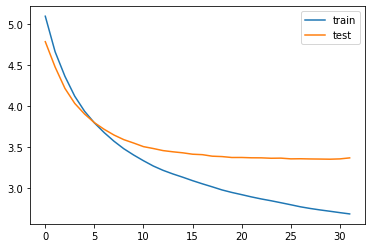

In [ ]:
# from matplotlib import pyplot
# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
# pyplot.legend()
# pyplot.show()

In [ ]:
# model.save('/content/drive/My Drive/Colab Notebooks/data')


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/data/assets


In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
from keras.models import model_from_json

def load_model(model_filename, model_weights_filename):
    with open(model_filename, 'r', encoding='utf8') as f:
        model = model_from_json(f.read())
    model.load_weights(model_weights_filename)
    return model

encoder_model = load_model(save_loc+'/encoder_model.json', save_loc+'/encoder_model_weights.h5')
decoder_model = load_model(save_loc+'/decoder_model.json', save_loc+'/decoder_model_weights.h5')

In [ ]:
# # Encode the input sequence to get the feature vector
# encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# # Decoder setup
# # Below tensors will hold the states of the previous time step
# decoder_state_input_h = Input(shape=(latent_dim,))
# decoder_state_input_c = Input(shape=(latent_dim,))
# decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# # Get the embeddings of the decoder sequence
# dec_emb2= dec_emb_layer(decoder_inputs) 
# # To predict the next word in the sequence, set the initial states to the states from the previous time step
# decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# # A dense softmax layer to generate prob dist. over the target vocabulary
# decoder_outputs2 = decoder_dense(decoder_outputs2) 

# # Final decoder model
# decoder_model = Model(
#     [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
#     [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
# # https://stackoverflow.com/questions/48158547/restore-keras-seq2seq-model
# save_loc = '/content/drive/My Drive/Colab Notebooks/data'
# with open(save_loc+'/encoder_model.json', 'w', encoding='utf8') as f:
#     f.write(encoder_model.to_json())
# encoder_model.save_weights(save_loc+'/encoder_model_weights.h5')

# with open(save_loc+'/decoder_model.json', 'w', encoding='utf8') as f:
#     f.write(decoder_model.to_json())
# decoder_model.save_weights(save_loc+'/decoder_model_weights.h5')

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
from tqdm import tqdm

In [ ]:
%%time
for i in range(30,40):
# for i in tqdm(range(0,10000)):

    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")
    # decode_sequence(x_tr[i].reshape(1,max_text_len))

print(len(x_tr))

Review: an east german secret police identity card belonging to russian president vladimir putin when he was soviet spy has been found in police archives in the city of dresden the card was issued in 1985 when putin was mid ranking soviet spy stationed in dresden in communist east germany which was then under russian occupation 
Original summary: start putin spy id card found in germany end 
Predicted summary:  start french prez putin charged with spying for the world war end


Review: bangladesh pm sheikh hasina has accused myanmar of finding new excuses to delay the return of over lakh rohingya muslims who fled myanmar to enter bangladesh over the past year adding that under no would the refugees remain permanently in bangladesh hasina said already have 16 crore people in my country can take any other burden 
Original summary: start myanmar delaying tactics blocking rohingya return desh end 
Predicted summary:  start bangladesh myanmar pm death for rohingya muslims end


Review: sura

In [ ]:
# from tensorflow import keras
# model2 = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/data')

In [ ]:
# model2.summary()
# model2.input[0], model2.input[1]

In [ ]:
# # model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
# model2.output


In [ ]:
# from keras.models import model_from_json

# def load_model(model_filename, model_weights_filename):
#     with open(model_filename, 'r', encoding='utf8') as f:
#         model = model_from_json(f.read())
#     model.load_weights(model_weights_filename)
#     return model

# encoder_ = load_model(save_loc+'/encoder_model.json', save_loc+'/encoder_model_weights.h5')
# decoder_ = load_model(save_loc+'/decoder_model.json', save_loc+'/decoder_model_weights.h5')

In [ ]:
# def decode_sequence2(input_seq):
#     # Encode the input as state vectors.
#     e_out, e_h, e_c = encoder_.predict(input_seq)
    
#     # Generate empty target sequence of length 1.
#     target_seq = np.zeros((1,1))
    
#     # Populate the first word of target sequence with the start word.
#     target_seq[0, 0] = target_word_index['sostok']

#     stop_condition = False
#     decoded_sentence = ''
#     while not stop_condition:
      
#         output_tokens, h, c = decoder_.predict([target_seq] + [e_out, e_h, e_c])

#         # Sample a token
#         sampled_token_index = np.argmax(output_tokens[0, -1, :])
#         sampled_token = reverse_target_word_index[sampled_token_index]

#         if(sampled_token!='eostok'):
#             decoded_sentence += ' '+sampled_token

#         # Exit condition: either hit max length or find stop word.
#         if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
#             stop_condition = True

#         # Update the target sequence (of length 1).
#         target_seq = np.zeros((1,1))
#         target_seq[0, 0] = sampled_token_index

#         # Update internal states
#         e_h, e_c = h, c

#     return decoded_sentence

In [ ]:

# x_tr2,x_val2,y_tr2,y_val2=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

# # y_tokenizer2 = Tokenizer()   
# # y_tokenizer2.fit_on_texts(list(y_tr2))

# y_tokenizer2 = Tokenizer(num_words=tot_cnt-cnt) 
# y_tokenizer2.fit_on_texts(list(y_tr2))
# x_tokenizer2 = Tokenizer(num_words=tot_cnt-cnt) 
# x_tokenizer2.fit_on_texts(list(x_tr2))


# reverse_target_word_index2=y_tokenizer2.index_word
# reverse_source_word_index2=x_tokenizer2.index_word
# target_word_index2=y_tokenizer2.word_index

# x_tr_seq2    =   x_tokenizer2.texts_to_sequences(x_tr2) 
# x_tr2    =   pad_sequences(x_tr_seq2,  maxlen=max_text_len, padding='post')

# y_tr_seq2    =   y_tokenizer.texts_to_sequences(y_tr2) 
# y_tr2    =   pad_sequences(y_tr_seq2, maxlen=max_summary_len, padding='post')


# ind=[]
# for i in range(len(y_tr2)):
#     cnt=0
#     for j in y_tr2[i]:
#         if j!=0:
#             cnt=cnt+1
#     if(cnt==2):
#         ind.append(i)

# y_tr2=np.delete(y_tr2,ind, axis=0)
# x_tr2=np.delete(x_tr2,ind, axis=0)

In [ ]:
# def seq2summary2(input_seq):
#     newString=''
#     for i in input_seq:
#         if((i!=0 and i!=target_word_index2['sostok']) and i!=target_word_index2['eostok']):
#             newString=newString+reverse_target_word_index2[i]+' '
#     return newString

# def seq2text2(input_seq):
#     newString=''
#     for i in input_seq:
#         if(i!=0):
#             newString=newString+reverse_source_word_index2[i]+' '
#     return newString

In [ ]:
# def decode_sequence2(input_seq):
#     # Encode the input as state vectors.
#     e_out, e_h, e_c = encoder_.predict(input_seq)
    
#     # Generate empty target sequence of length 1.
#     target_seq = np.zeros((1,1))
    
#     # Populate the first word of target sequence with the start word.
#     target_seq[0, 0] = target_word_index2['sostok']

#     stop_condition = False
#     decoded_sentence = ''
#     while not stop_condition:
      
#         output_tokens, h, c = decoder_.predict([target_seq] + [e_out, e_h, e_c])

#         # Sample a token
#         sampled_token_index = np.argmax(output_tokens[0, -1, :])
#         sampled_token = reverse_target_word_index2[sampled_token_index]

#         if(sampled_token!='eostok'):
#             decoded_sentence += ' '+sampled_token

#         # Exit condition: either hit max length or find stop word.
#         if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
#             stop_condition = True

#         # Update the target sequence (of length 1).
#         target_seq = np.zeros((1,1))
#         target_seq[0, 0] = sampled_token_index

#         # Update internal states
#         e_h, e_c = h, c

#     return decoded_sentence

In [ ]:
# for i in range(0,10):
#     print("Review:",seq2text2(x_tr2[i]))
#     print("Original summary:",seq2summary2(y_tr2[i]))
#     print("Predicted summary:",decode_sequence2(x_tr2[i].reshape(1,max_text_len)))
#     print("\n")

In [ ]:
x_tr2.shape

(88517, 100)